In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

In [57]:
data_titanic = pd.read_csv('Titanic_survival.csv')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
gender= {'male':0, 'female':1}
data_titanic = data_titanic.replace({'Sex':gender})
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
data_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
mean_age = data_titanic['Age'].mean()
mean_fare = data_titanic['Fare'].mean()
data_titanic['Age'].fillna(mean_age, inplace=True)
data_titanic['Fare'].fillna(mean_fare, inplace=True)
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [62]:
selection_cols = ['PassengerId', 'Pclass','Sex','Age','Fare','SibSp', 'Survived']
data = data_titanic[selection_cols]
data.head()

,PassengerId,Pclass,Sex,Age,Fare,SibSp,Survived
0,892,3,0,34.5,7.8292,0,0
1,893,3,1,47.0,7.0000,1,1
2,894,2,0,62.0,9.6875,0,0
3,895,3,0,27.0,8.6625,0,0
4,896,3,1,22.0,12.2875,1,1


In [63]:
data.corr()

,PassengerId,Pclass,Sex,Age,Fare,SibSp,Survived
PassengerId,1.000000,-0.026751,-0.023245,-0.030874,0.008209,0.003818,-0.023245
Pclass,-0.026751,1.000000,-0.108615,-0.440782,-0.576619,0.001087,-0.108615
Sex,-0.023245,-0.108615,1.000000,-0.000011,0.191382,0.099943,1.000000
Age,-0.030874,-0.440782,-0.000011,1.000000,0.326800,-0.079535,-0.000011
Fare,0.008209,-0.576619,0.191382,0.326800,1.000000,0.171488,0.191382
SibSp,0.003818,0.001087,0.099943,-0.079535,0.171488,1.000000,0.099943
Survived,-0.023245,-0.108615,1.000000,-0.000011,0.191382,0.099943,1.000000


Seems like all the males died and females survived
Every other parameter has very low correlation with survival


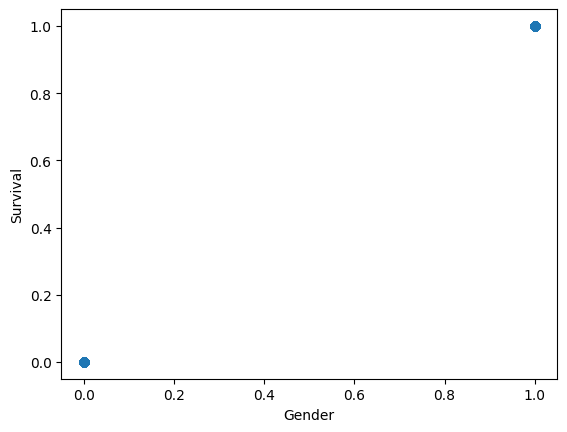

In [64]:
plt.scatter(data['Sex'], data['Survived'])
plt.xlabel('Gender')
plt.ylabel('Survival')
print ('Seems like all the males died and females survived')
print ('Every other parameter has very low correlation with survival')
plt.show()

In [65]:
df_age_survived = data[data['Survived']==1]
df_age_died =  data[data['Survived']==0]

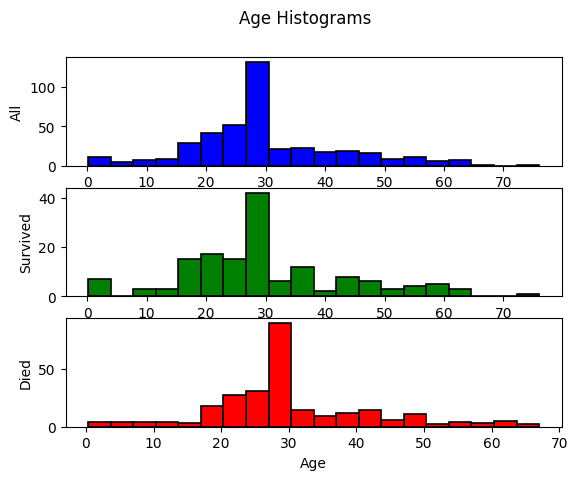

In [72]:
fig, ax = plt.subplots(3,squeeze=False)
fig.suptitle("Age Histograms")
axes = ax.ravel()
axes[0].hist(data['Age'],20, color = 'blue', edgecolor = 'black', linewidth  = 1.2)
axes[1].hist(df_age_survived['Age'], 20, linewidth =1.2, edgecolor = 'black', color = 'green')
axes[2].hist(df_age_died['Age'], 20, linewidth =1.2, edgecolor = 'black', color = 'red')
axes[0].set_ylabel('All')
axes[1].set_ylabel('Survived')
axes[2].set_ylabel('Died')
axes[2].set_xlabel('Age')
plt.show()

In [74]:
model_input = np.array(data[['PassengerId', 'Pclass','Sex','Age','Fare','SibSp']])
model_output = np.array(data[['Survived']])
print (model_input.shape, model_output.shape)

(418, 6) (418, 1)


In [75]:
model = RandomForestClassifier(n_estimators=20, 
                               verbose = 1,
                               )
model.fit(model_input, model_output)

c:\Users\Dixant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=20, verbose=1)

In [87]:
pred = np.random.rand(1,6) #replace with test data set
print (pred)
survival_num = model.predict(pred)
if (survival_num==1):
    print ("The person Survived!!!!")
else:
    print ("The person did not Survive!!!")


[[0.74061934 0.93885942 0.42082223 0.91037644 0.66027379 0.95147245]]
The person did not Survive!!!


In [110]:
def prediction(data):
    data = data.replace({'Sex': gender})
    mean_age = data_titanic['Age'].mean()
    mean_fare = data_titanic['Fare'].mean()
    data['Age'].fillna(mean_age, inplace=True)
    data['Fare'].fillna(mean_fare, inplace=True)
    model_input = np.array(data[['PassengerId', 'Pclass','Sex','Age','Fare','SibSp']])
    survival_num = model.predict(model_input)
    print (survival_num)
    return survival_num
    

In [111]:
new_pred = prediction(pd.read_csv('Titanic_survival.csv'))
#use prediction function with the csv file to use other testing sets!!!

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
